In [307]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [308]:
d = 2
np.random.seed(1337)
x = np.random.rand(100) * 5
y = np.random.normal(loc = 0, scale=0.3, size=100) + x # Linear function with slope 1 added noise epsilon
X = np.dstack((x,y))[0]

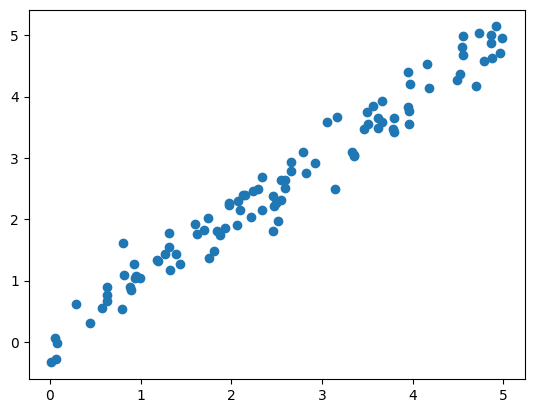

In [309]:
plt.scatter(X[:,0], X[:,1])

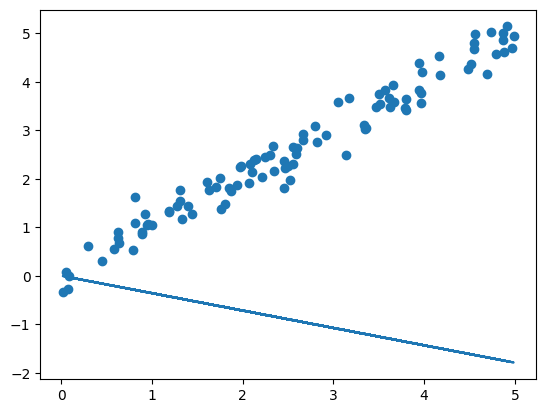

In [310]:
# Start cov
covariance = np.array([[2, 1.5], [1.5, 2]])
mean = 0
theta_prior = np.random.normal(loc=mean, scale=1.0, size=[d,1])
def f(x, theta):
    x_reshaped = np.reshape(x, (x.shape[0], 1))
    zeros = np.zeros((x.shape[0], 1))
    x_aug = np.concatenate((x_reshaped, zeros), axis=1)
    #print(theta_prior.T)
    # theta.T * x_aug
    return np.dot(x_aug, theta)
plt.scatter(X[:,0], X[:,1])
#print(f(np.sort(x)))
plt.plot(x, f(x, theta_prior))

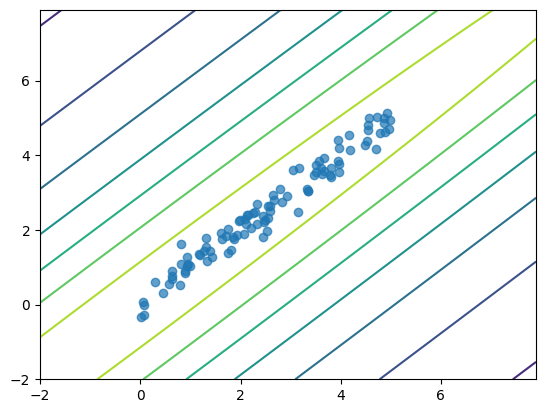

In [339]:
def get_theta(X, y, covariance_prior):
    var_y = np.var(y) * np.eye(100)
    mean_theta = covariance @ X.T @ np.linalg.inv(var_y + X @ covariance @ X.T) @ y
    cov_theta = covariance - covariance @ X.T @ np.linalg.inv(var_y + X @ covariance @ X.T) @ X @ covariance
#plt.scatter(X[:,0], X[:,1])
# Evaluate the Gaussian density at each point on the grid
#z = np.exp(-0.5 * np.sum((xy - mean) @ np.linalg.inv(covariance) * (xy - mean), axis=1))
#print(stats.multivariate_normal.pdf(xy[0], mean=xy[0].T @ mean_new, cov=np.var(y) + xy[0].T @ cov_new @ xy[0]))
#z = np.array([stats.multivariate_normal.pdf(x, mean=x.T @ mean_new, cov=np.var(y) + x.T @ cov_new @ x) for x in xy])
#z = z.reshape(xgrid.shape)

def plot(mean, cov, x, y):
    # Define the grid for the contour plot
    x_grid, y_grid = np.mgrid[-2:8:.1, -2:8:.1]

    pos = np.empty(x_grid.shape + (2,))
    pos[:, :, 0] = x_grid
    pos[:, :, 1] = y_grid
    #print(np.dstack((x_grid, y_grid)))
    z = []

    # Create a multivariate normal distribution
    for row in np.dstack((x_grid, y_grid)):
        row_z = []
        for p in row:
            #p = np.array([x_var, y_var])
            #print(p)
            rv = stats.multivariate_normal(p.T @ mean, np.var(y) + p.T @ cov @ p)
            # Evaluate the probability density function on the grid
            row_z.append(rv.pdf(p.T @ mean_new))
        z.append(np.array(row_z))
    z = np.array(z).reshape(x_grid.shape)
    # Plot the scatter plot
    plt.contour(x_grid, y_grid, z)
    plt.scatter(x, y, alpha=0.7)
    plt.show()


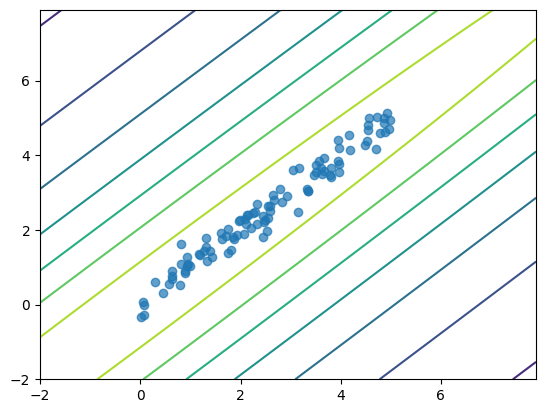

In [340]:
plot(mean_new, cov_new, x, y)